<a href="https://colab.research.google.com/github/sashwot/DataScience/blob/main/DataWrangaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cleaning Data


In EDA, we are trying to do things:
1. Gain an intuition for what the data is telling us.
2. Dig up anomolies or noise that will be unhelpful for us later (Data Cleaning)
3. Make sure that we are asking good questions that are grounded in what is happening.



In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_ecomm = pd.read_csv("data.csv", encoding = "ISO-8859-1")

In [ ]:
display(df_ecomm.describe())
print("\n" *3)
display(df_ecomm.info())

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None

In [ ]:
#weird -- there are some negative numbers where there shouldn't be
#What does it mean that the quantity is negative? or the price being negative?
#Lets take a closer look.
display(df_ecomm[df_ecomm["Quantity"]<0])
df_returns = df_ecomm[df_ecomm["Quantity"]<0]
df_ecomm = df_ecomm.drop(df_ecomm.loc[df_ecomm["Quantity"]<0].index, axis=0)


#Let's look at a single example
display(df_ecomm[df_ecomm["CustomerID"]==17548.0])
#Looks like negative quanitites refer to returns


#What about Quantitities that are 0?
display(df_ecomm[df_ecomm["Quantity"]==0])


#Looks like we have some returns.  I'd be interested to know what the most returned items are
#How many unique customers return (as a raw number and total of the number of customers)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,4/20/2011 12:01,1.25,17548.0,United Kingdom
165025,550755,22082,RIBBON REEL STRIPES DESIGN,10,4/20/2011 12:01,1.65,17548.0,United Kingdom
165026,550755,22081,RIBBON REEL FLORA + FAUNA,10,4/20/2011 12:01,1.65,17548.0,United Kingdom
165027,550755,22079,RIBBON REEL HEARTS DESIGN,10,4/20/2011 12:01,1.65,17548.0,United Kingdom
165028,550755,22926,IVORY GIANT GARDEN THERMOMETER,4,4/20/2011 12:01,5.95,17548.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
#Also, what is the deal with unit price being less than 0?
display(df_ecomm[df_ecomm["UnitPrice"]<0])

#Ah, this seems to be debt and can probably be dropped.
df_ecomm = df_ecomm.drop(df_ecomm[df_ecomm["UnitPrice"]<0].index, axis=0)

#Begs the question, does price ever equal 0?
#display(df_ecomm[df_ecomm["UnitPrice"]==0]).sort_values("CustomerID", ascending=False)

#quite often, it looks.  There are 2515 free entries. and they are all over the map, but there are no customers
#So let us go ahead and drop these items
df_ecomm = df_ecomm.drop(df_ecomm[df_ecomm["UnitPrice"]==0].index, axis=0)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [ ]:
#Looking at some null values under customerIDs.
display(df_ecomm[df_ecomm["CustomerID"].isnull()])


#split the Date into month, day, year, time

df_ecomm[["dPart1", "dPart2", "dPart3"]] = df_ecomm["InvoiceDate"].str.split('/', expand=True)
df_ecomm.info()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    530104 non-null  object 
 1   StockCode    530104 non-null  object 
 2   Description  530104 non-null  object 
 3   Quantity     530104 non-null  int64  
 4   InvoiceDate  530104 non-null  object 
 5   UnitPrice    530104 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      530104 non-null  object 
 8   dPart1       530104 non-null  object 
 9   dPart2       530104 non-null  object 
 10  dPart3       530104 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 48.5+ MB


In [ ]:
#making sure if dParts 1 and 2 to be integers
df_ecomm = df_ecomm.astype({"dPart1": "int32", "dPart2": "int32"})
df_ecomm[["dPart1", "dPart2"]].describe()

#Max of 12 means month. and max of 31 means day.  So dPart1 is month, and dPart2 is day
df_ecomm[["InvoiceMonth", "InvoiceDay"]] = df_ecomm[["dPart1", "dPart2"]]

#handle the year and time issue:
df_ecomm[["InvoiceYear", "Time"]] = df_ecomm["dPart3"].str.split(expand=True)
df_ecomm[["InvoiceHour", "InvoiceMinute"]] = df_ecomm["Time"].str.split(":", expand=True)
df_ecomm["InvoiceDate"] = pd.to_datetime(df_ecomm["InvoiceDate"])
df_ecomm["InvoiceDOW"] = df_ecomm["InvoiceDate"].dt.day_name()

df_ecomm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      530104 non-null  object        
 1   StockCode      530104 non-null  object        
 2   Description    530104 non-null  object        
 3   Quantity       530104 non-null  int64         
 4   InvoiceDate    530104 non-null  datetime64[ns]
 5   UnitPrice      530104 non-null  float64       
 6   CustomerID     397884 non-null  float64       
 7   Country        530104 non-null  object        
 8   dPart1         530104 non-null  int32         
 9   dPart2         530104 non-null  int32         
 10  dPart3         530104 non-null  object        
 11  InvoiceMonth   530104 non-null  int32         
 12  InvoiceDay     530104 non-null  int32         
 13  InvoiceYear    530104 non-null  object        
 14  Time           530104 non-null  object        
 15  

In [ ]:
df_clean = df_ecomm.drop(columns=["Time", "dPart1", "dPart2", "dPart3", "InvoiceMinute", "InvoiceDate"])
df_clean = df_clean.astype({"InvoiceYear": "int32", "InvoiceHour": "int32"})

display(df_clean.info())
display(df_clean.head(5))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     530104 non-null  object 
 1   StockCode     530104 non-null  object 
 2   Description   530104 non-null  object 
 3   Quantity      530104 non-null  int64  
 4   UnitPrice     530104 non-null  float64
 5   CustomerID    397884 non-null  float64
 6   Country       530104 non-null  object 
 7   InvoiceMonth  530104 non-null  int32  
 8   InvoiceDay    530104 non-null  int32  
 9   InvoiceYear   530104 non-null  int32  
 10  InvoiceHour   530104 non-null  int32  
 11  InvoiceDOW    530104 non-null  object 
dtypes: float64(2), int32(4), int64(1), object(5)
memory usage: 44.5+ MB


None

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceDay,InvoiceYear,InvoiceHour,InvoiceDOW
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,12,1,2010,8,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,12,1,2010,8,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,12,1,2010,8,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,12,1,2010,8,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,12,1,2010,8,Wednesday


In [ ]:
#Figuring out what is happening with those null customerIDs
df_clean[df_clean["CustomerID"].isnull()].groupby(["InvoiceMonth", "InvoiceYear"]).count()


,,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceHour,InvoiceDOW
InvoiceMonth,InvoiceYear,,,,,,,,,,
1,2011,13077,13077,13077,13077,13077,0,13077,13077,13077,13077
2,2011,7178,7178,7178,7178,7178,0,7178,7178,7178,7178
3,2011,8628,8628,8628,8628,8628,0,8628,8628,8628,8628
4,2011,6454,6454,6454,6454,6454,0,6454,6454,6454,6454
5,2011,7844,7844,7844,7844,7844,0,7844,7844,7844,7844
6,2011,8792,8792,8792,8792,8792,0,8792,8792,8792,8792
7,2011,11820,11820,11820,11820,11820,0,11820,11820,11820,11820
8,2011,7476,7476,7476,7476,7476,0,7476,7476,7476,7476
9,2011,9233,9233,9233,9233,9233,0,9233,9233,9233,9233


In [ ]:
# 1 year of null values with null customerIDs from
# Dec 2010 - Dec 2011
# I think it makes sense to just drop these values. but i don't want to lose them.
# We should interogate them later to see if the follow a similar pattern to what we found in the other data.

df = df_clean.drop(df_clean.loc[df_clean["CustomerID"].isnull()].index, axis=0)
display(df.info())
df.describe()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     397884 non-null  object 
 1   StockCode     397884 non-null  object 
 2   Description   397884 non-null  object 
 3   Quantity      397884 non-null  int64  
 4   UnitPrice     397884 non-null  float64
 5   CustomerID    397884 non-null  float64
 6   Country       397884 non-null  object 
 7   InvoiceMonth  397884 non-null  int32  
 8   InvoiceDay    397884 non-null  int32  
 9   InvoiceYear   397884 non-null  int32  
 10  InvoiceHour   397884 non-null  int32  
 11  InvoiceDOW    397884 non-null  object 
dtypes: float64(2), int32(4), int64(1), object(5)
memory usage: 33.4+ MB


None

,Quantity,UnitPrice,CustomerID,InvoiceMonth,InvoiceDay,InvoiceYear,InvoiceHour
count,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453,7.612475,15.042186,2010.934260,12.728202
std,179.331775,22.097877,1713.141560,3.416520,8.653746,0.247828,2.273519
min,1.000000,0.001000,12346.000000,1.000000,1.000000,2010.000000,6.000000
25%,2.000000,1.250000,13969.000000,5.000000,7.000000,2011.000000,11.000000
50%,6.000000,1.950000,15159.000000,8.000000,15.000000,2011.000000,13.000000
75%,12.000000,3.750000,16795.000000,11.000000,22.000000,2011.000000,14.000000
max,80995.000000,8142.750000,18287.000000,12.000000,31.000000,2011.000000,20.000000



# New Section

Basket:
- What is our mean, median, range on basket sizes? How are they distributed?
- What products sell the most in quantity?
- What sell the most in revenue?
- What products co-sell together well (if someone buys one, they are likely to buy another)?
- What products are returned the most often?

Demographics:
- Which customers ordered the most in volume? in price?
- Which countries ordered the most in volume? in price?
- What percentage of customers repeat-purchase? and how do their purchases trend?
- What customers return the most often?

Let's run through these questions systematically and start generating some insights!


In [ ]:
#Time Questions:
#First lets add Day of the week as a column:
%matplotlib inline


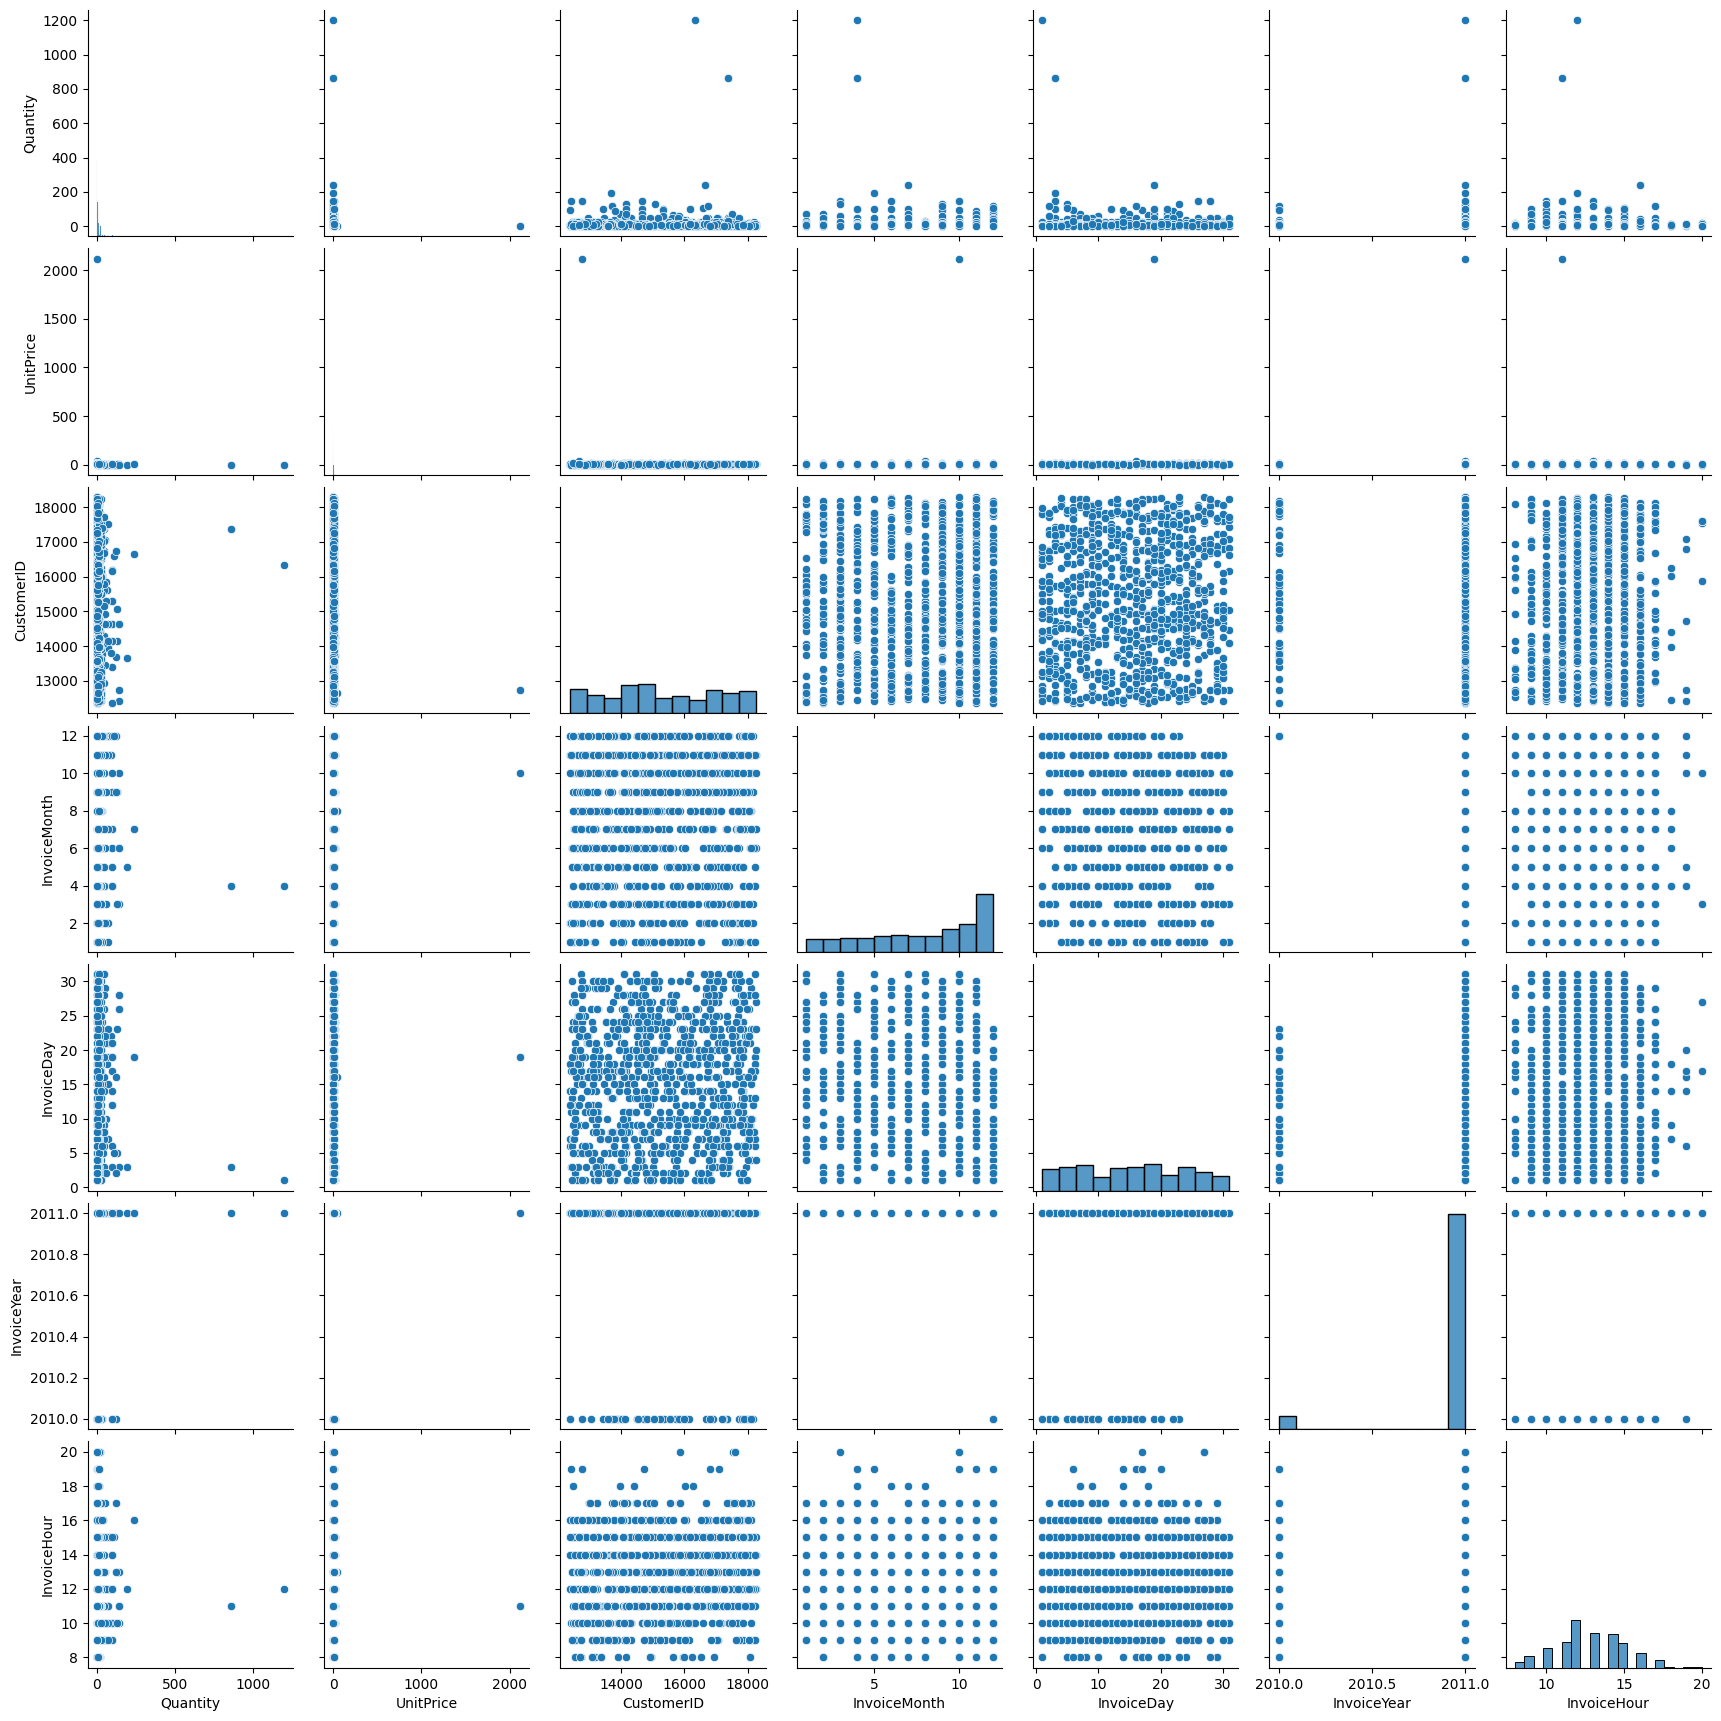

In [ ]:
#Before we do anything, lets look at how our data is interrelated:
# Recognizing patterns in data, to draw logical conclusions and making recommendations.
sns.pairplot(df.sample(1000))

In [ ]:
df.describe()
df = df.drop(df.loc[df["Quantity"]>65000].index, axis=0)


In [ ]:
df_ecomm.info()
print("\n" * 5)
df_ecomm["UnitPrice"].quantile(0.9999)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      530104 non-null  object        
 1   StockCode      530104 non-null  object        
 2   Description    530104 non-null  object        
 3   Quantity       530104 non-null  int64         
 4   InvoiceDate    530104 non-null  datetime64[ns]
 5   UnitPrice      530104 non-null  float64       
 6   CustomerID     397884 non-null  float64       
 7   Country        530104 non-null  object        
 8   dPart1         530104 non-null  int32         
 9   dPart2         530104 non-null  int32         
 10  dPart3         530104 non-null  object        
 11  InvoiceMonth   530104 non-null  int32         
 12  InvoiceDay     530104 non-null  int32         
 13  InvoiceYear    530104 non-null  object        
 14  Time           530104 non-null  object        
 15  

1008.7441119982861

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID,InvoiceMonth,InvoiceDay,InvoiceYear,InvoiceHour
count,397882.000000,397882.000000,397882.000000,397882.000000,397882.000000,397882.000000,397882.000000
mean,12.598213,3.116496,15294.427969,7.612481,15.042193,2010.934259,12.728218
std,42.886003,22.097932,1713.138517,3.416505,8.653762,0.247828,2.273513
min,1.000000,0.001000,12347.000000,1.000000,1.000000,2010.000000,6.000000
25%,2.000000,1.250000,13969.000000,5.000000,7.000000,2011.000000,11.000000
50%,6.000000,1.950000,15159.000000,8.000000,15.000000,2011.000000,13.000000
75%,12.000000,3.750000,16795.000000,11.000000,22.000000,2011.000000,14.000000
max,4800.000000,8142.750000,18287.000000,12.000000,31.000000,2011.000000,20.000000


<Axes: xlabel='InvoiceDOW', ylabel='Quantity'>

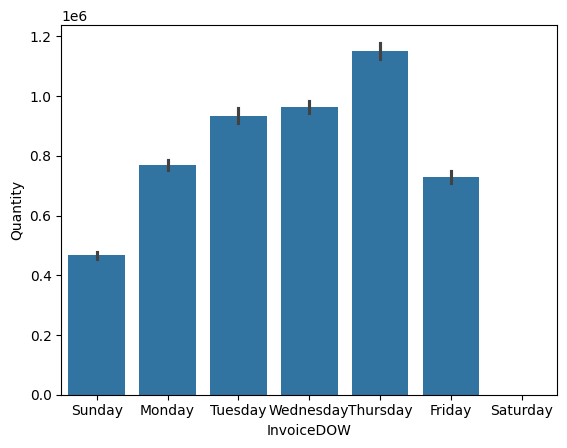

In [ ]:
sns.barplot(x="InvoiceDOW", y="Quantity", data=df, order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], estimator="sum")

<Axes: xlabel='InvoiceMonth', ylabel='Quantity'>

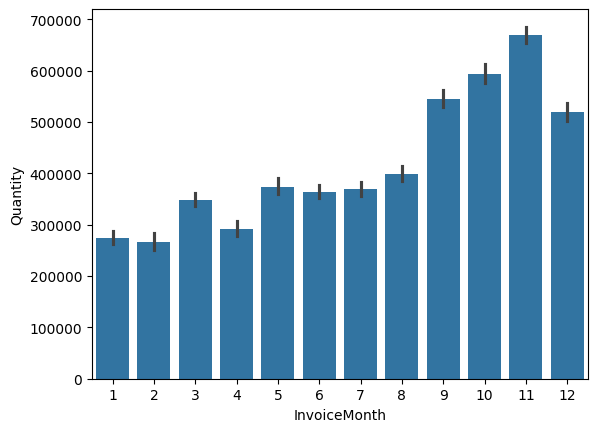

In [ ]:
sns.barplot(x="InvoiceMonth", y="Quantity", data=df, estimator= np.sum)

<Axes: xlabel='InvoiceHour', ylabel='Quantity'>

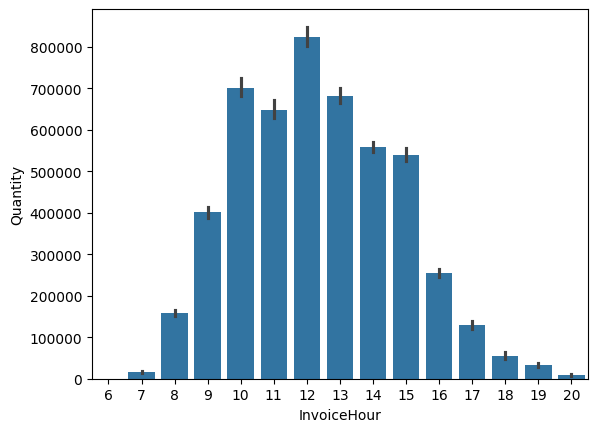

In [ ]:
sns.barplot(x="InvoiceHour", y="Quantity", data=df, estimator="sum")

<Axes: xlabel='InvoiceHour', ylabel='Quantity'>

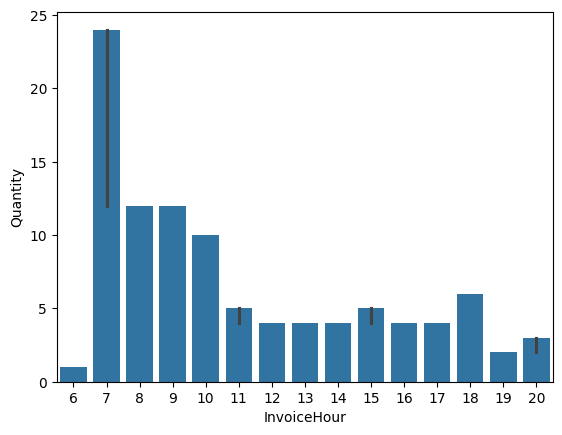

In [ ]:
sns.barplot(x="InvoiceHour", y="Quantity", data=df, estimator="median")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397882 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     397882 non-null  object 
 1   StockCode     397882 non-null  object 
 2   Description   397882 non-null  object 
 3   Quantity      397882 non-null  int64  
 4   UnitPrice     397882 non-null  float64
 5   CustomerID    397882 non-null  float64
 6   Country       397882 non-null  object 
 7   InvoiceMonth  397882 non-null  int32  
 8   InvoiceDay    397882 non-null  int32  
 9   InvoiceYear   397882 non-null  int32  
 10  InvoiceHour   397882 non-null  int32  
 11  InvoiceDOW    397882 non-null  object 
dtypes: float64(2), int32(4), int64(1), object(5)
memory usage: 33.4+ MB


# **By looking at above information we can finialize that their is no null value in the above data this the data is clean**


<Axes: xlabel='Country', ylabel='Quantity'>

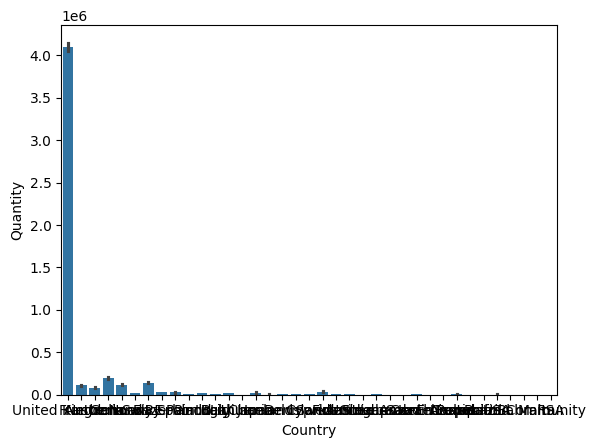

In [ ]:
sns.barplot (x="Country", y="Quantity", data=df, estimator=np.sum)

In [ ]:
df.groupby("Country")["Quantity"].sum().sort_values()

Country
Saudi Arabia                 80
Bahrain                     260
RSA                         351
Brazil                      356
Lebanon                     386
European Community          499
Lithuania                   652
Czech Republic              671
Malta                       970
United Arab Emirates        982
Greece                     1557
Unspecified                1789
USA                        2458
Iceland                    2458
Canada                     2763
Poland                     3684
Israel                     4046
Austria                    4881
Singapore                  5241
Cyprus                     6361
Italy                      8112
Denmark                    8235
Channel Islands            9491
Finland                   10704
Portugal                  16122
Norway                    19336
Belgium                   23237
Japan                     26016
Spain                     27940
Switzerland               30082
Sweden                    36083


In [ ]:
df["Amount"] = df["Quantity"] * df["UnitPrice"]
df.head(10)



,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceDay,InvoiceYear,InvoiceHour,InvoiceDOW,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,12,1,2010,8,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,12,1,2010,8,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,12,1,2010,8,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,12,1,2010,8,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,12,1,2010,8,Wednesday,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,17850.0,United Kingdom,12,1,2010,8,Wednesday,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,17850.0,United Kingdom,12,1,2010,8,Wednesday,25.50
7,536366,22633,HAND WARMER UNION JACK,6,1.85,17850.0,United Kingdom,12,1,2010,8,Wednesday,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,17850.0,United Kingdom,12,1,2010,8,Wednesday,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047.0,United Kingdom,12,1,2010,8,Wednesday,54.08


In [ ]:
df_basket = df.groupby(["InvoiceNo","CustomerID", "Country", "InvoiceDOW"])["Quantity","Amount"].sum()
df_basket = df_basket.reset_index()

<ipython-input-42-f1a56ea1d770>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_basket = df.groupby(["InvoiceNo","CustomerID", "Country", "InvoiceDOW"])["Quantity","Amount"].sum()


In [ ]:
df_basket.head(10)

,InvoiceNo,CustomerID,Country,InvoiceDOW,Quantity,Amount
0,536365,17850.0,United Kingdom,Wednesday,40,139.12
1,536366,17850.0,United Kingdom,Wednesday,12,22.20
2,536367,13047.0,United Kingdom,Wednesday,83,278.73
3,536368,13047.0,United Kingdom,Wednesday,15,70.05
4,536369,13047.0,United Kingdom,Wednesday,3,17.85
5,536370,12583.0,France,Wednesday,449,855.86
6,536371,13748.0,United Kingdom,Wednesday,80,204.00
7,536372,17850.0,United Kingdom,Wednesday,12,22.20
8,536373,17850.0,United Kingdom,Wednesday,88,259.86
9,536374,15100.0,United Kingdom,Wednesday,32,350.40
